<a href="https://colab.research.google.com/github/samy387/Arabian/blob/main/Interactive_SVM_and_Distance_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive SVM and Distance Metrics Tutorial

Welcome to this interactive notebook! You'll learn about **Support Vector Machines (SVM)** and **distance metrics** (Euclidean, Manhattan, and Cosine Similarity) using the **Social Network Ads** dataset. Your task is to complete the missing code sections. The notebook will check your answers automatically and provide feedback.

## Dataset
We'll use the Social Network Ads dataset, which contains information about users (age, estimated salary) and whether they purchased a product (0 or 1).
Download from here: https://www.kaggle.com/datasets/rakeshrau/social-network-ads?select=Social_Network_Ads.csv

## Instructions
- Fill in the missing code in the cells marked with `# YOUR CODE HERE`.

Let's get started!

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Social_Network_Ads.csv")
print('Dataset loaded successfully.')
data.head()

Dataset loaded successfully.


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Step 1: Data Preprocessing

The dataset has columns: `User ID`, `Gender`, `Age`, `EstimatedSalary`, and `Purchased`. We'll use `Age` and `EstimatedSalary` as features and `Purchased` as the target.

**Task 1**: Select the features (`Age`, `EstimatedSalary`) and the target (`Purchased`). Assign them to `X` (features) and `y` (target).

Complete the code below:

In [ ]:
# YOUR CODE HERE
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
```

**Task 2**: Split the data into training (80%) and testing (20%) sets using `train_test_split`. Use `random_state=42` for reproducibility.

Complete the code below:

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

**Task 3**: Standardize the features using `StandardScaler` to ensure `Age` and `EstimatedSalary` are on the same scale.

Complete the code below:

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# YOUR CODE HERE
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform the training data
X_test_scaled = scaler.transform(X_test) # Transform the test data

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

## Step 2: Understanding Distance Metrics

We'll compute different distance metrics between two points in the dataset to understand how they work.

**Task 4**: Compute the **Euclidean distance** between the first two points in `X_train_scaled`.

Hint: Euclidean distance between two points \(a\) and \(b\) is \(\\sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2}\).

Complete the code below:

In [ ]:
# Select first two points
point1 = X_train_scaled[0]
point2 = X_train_scaled[1]

# YOUR CODE HERE
euclidean_dist = np.sqrt(np.sum((point1 - point2)**2)) # Compute Euclidean distance

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
euclidean_dist = np.sqrt(np.sum((point1 - point2) ** 2))
```

**Task 5**: Compute the **Manhattan distance** between the same two points.

Hint: Manhattan distance is (\\sum |a_i - b_i|).

Complete the code below:

In [ ]:
# YOUR CODE HERE
manhattan_dist = np.sum(np.abs(point1 - point2)) # Compute Manhattan distance

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
manhattan_dist = np.sum(np.abs(point1 - point2))
```

**Task 6**: Compute the **Cosine similarity** between the same two points.

Hint: Cosine similarity is (\\frac{a \cdot b}{\\|a\\| \\|b\\|}), where (\cdot) is the dot product, and (\\|a\\|) is the norm of vector (a).

Complete the code below:

In [ ]:
# YOUR CODE HERE
cosine_sim = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2)) # Compute Cosine similarity

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
cosine_sim = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
```

## Step 3: Distance Matrix

Let's compute the distance matrix for the first 10 points in `X_train_scaled` using different metrics.

**Task 7**: Compute the Euclidean distance matrix for the first 10 points using `pairwise_distances`.

Complete the code below:

In [ ]:
# Select first 10 points
X_subset = X_train_scaled[:10]

# YOUR CODE HERE
euclidean_matrix = pairwise_distances(X_subset, metric='euclidean') # Compute Euclidean distance matrix

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
euclidean_matrix = pairwise_distances(X_subset, metric='euclidean')
```

## Step 4: Training an SVM Model

Now, let's train an SVM model with a linear kernel on the scaled training data.

**Task 8**: Initialize and train an SVM classifier with a linear kernel.

Complete the code below:

In [ ]:
# YOUR CODE HERE
svm_model = SVC(kernel='linear') # Initialize SVM with linear kernel
# Train the model
# YOUR CODE HERE
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
```

**Task 9**: Evaluate the SVM model on the test set by computing the accuracy.

Complete the code below:

In [ ]:
# YOUR CODE HERE
y_pred = svm_model.predict(X_test_scaled) # Predict on test set
accuracy = accuracy_score(y_test, y_pred) # Compute accuracy

<details>
<summary></summary>

```python
**Solution** (hidden from students):
```python
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
```

## Step 5: Visualizing the Decision Boundary

Let's visualize the SVM decision boundary to understand how it separates the classes.

The code below is complete for you to run and observe the results.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


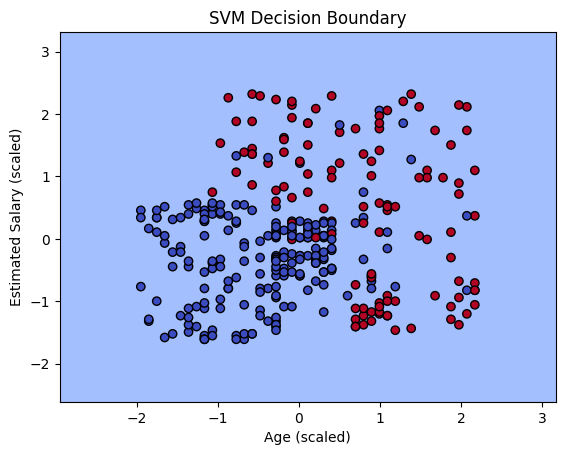

In [ ]:
# Plot decision boundary
def plot_decision_boundary(X, y, model, scaler):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, svm_model, scaler)

## Conclusion

Congratulations! You've completed the interactive notebook. You've learned how to:
- Preprocess data (selecting features, splitting, scaling).
- Compute distance metrics (Euclidean, Manhattan, Cosine Similarity).
- Train and evaluate an SVM model.
- Visualize the decision boundary.

Try experimenting with different SVM kernels (e.g., 'rbf') or parameters (e.g., `C`) to see how they affect the results!